### File name to be used in this analysis

In [186]:
FILE_NAME = 'results_fcfs-10000-0,6.csv'

### Imports:

In [187]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from typing import List

### Função para plotar gráficos, a qual pode ser usada ao fim desse notebook

In [188]:
def plot(y: List[List], x: List = [], label: List = [], x_label: str = '', y_label: str = '') -> None:
    plt.rcParams["figure.figsize"] = [22.50, 7.50]
    x = x if x else [k+1 for k in range(len(y[0]))]
    label = label if label else ['']*len(y)
    for lab, yi in zip(label, y):
        plt.plot(x, yi, label=lab)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend(bbox_to_anchor=(1.1, 1.0))
    
    plt.show()

### Initializing our DataFrame

In [189]:
df = pd.read_csv(FILE_NAME, delimiter=',', header=None, names=['batch', 'E_W', 'V_W', 'E_Nq', 'V_Nq'], skiprows=1)

In [190]:
df['E_W'] = df['E_W'].map(lambda x: float(x))
df['V_W'] = df['V_W'].map(lambda x: float(x))
df['E_Nq'] = df['E_Nq'].map(lambda x: float(x))
df['V_Nq'] = df['V_Nq'].map(lambda x: float(x))


In [191]:
df

,batch,E_W,V_W,E_Nq,V_Nq
0,1,1.461949,5.498785,0.8697,2.944216
1,2,1.719312,7.262393,1.0709,4.007674
2,3,1.509989,5.242589,0.9165,2.810809
3,4,1.542075,5.920909,0.9168,2.950573
4,5,1.496679,5.222747,0.9112,2.781393
...,...,...,...,...,...
3195,3196,1.515833,5.214257,0.9005,2.561856
3196,3197,1.459960,4.824568,0.8761,2.488398
3197,3198,1.322036,4.204193,0.7513,1.924241
3198,3199,1.424324,4.470592,0.8470,2.457637


### Mean for E[W] and E[Nq]:

In [192]:
avgs = []
avgs.append(df['E_W'].mean())
avgs.append(df['E_Nq'].mean())
avgs

[1.5003905841321603, 0.9007142812500001]

### T-Student for mean(W) and mean(Nq):

In [ ]:
soma = np.zeros(2)
for index, row in df.iterrows():
    soma[0] += (row['E_W'] - avgs[0])**2
    soma[1] += (row['E_Nq'] - avgs[1])**2
var = soma * 1/(len(df) - 1)
display(var)

array([0.08563008, 0.04769957])

In [193]:
mean_width_ic = [sqrt(var[0])/sqrt(len(df)), sqrt(var[1])/sqrt(len(df))]
mean_IC_w = (avgs[0] - 1.96*mean_width_ic[0], avgs[0] + 1.96*mean_width_ic[0])
mean_IC_nq = (avgs[1] - 1.96*mean_width_ic[1], avgs[1] + 1.96*mean_width_ic[1])

In [194]:
print(f"IC da média de W: {mean_IC_w}")
print(f"IC da média de Nq: {mean_IC_nq}")

IC da média de W: (1.4902516044534821, 1.5105295638108385)
IC da média de Nq: (0.893147027434577, 0.9082815350654232)


In [195]:
mean_accuracy_w = (mean_IC_w[1] - mean_IC_w[0])/(mean_IC_w[1] + mean_IC_w[0])
mean_accuracy_nq = (mean_IC_nq[1] - mean_IC_nq[0])/(mean_IC_nq[1] + mean_IC_nq[0])

print(f"W mean precision: {round(mean_accuracy_w*100,3)}%\nNq mean precision: {round(mean_accuracy_nq*100,3)}%")

W mean precision: 0.676%
Nq mean precision: 0.84%


### Average Variance for E[W] and E[Nq]:

In [196]:
var_w = df['V_W'].mean()
var_nq = df['V_Nq'].mean()

print(f"Var(W) = {var_w}")
print(f"Var(Nq) = {var_nq}")

Var(W) = 5.240863602338525
Var(Nq) = 2.7859965611217374


### Chi-Square for Var(W) and Var(Nq):

In [197]:
X2right = 3357.7 # df = 3199 | p = 0.025
X2left  = 3044.1 # df = 3199 | p = 0.975
var_IC_w = (((len(df)-1) * var_w)/X2right, ((len(df)-1) * var_w)/X2left)
var_IC_nq = (((len(df)-1) * var_nq)/X2right, ((len(df)-1) * var_nq)/X2left)

In [198]:
print(f"IC da variância de W: {var_IC_w}")
print(f"IC da variância de Nq: {var_IC_nq}")

IC da variância de W: (4.99315682278969, 5.507546619322933)
IC da variância de Nq: (2.6543178363249957, 2.927762885262783)


In [199]:
var_accuracy_w = (var_IC_w[1] - var_IC_w[0])/(var_IC_w[1] + var_IC_w[0])
var_accuracy_nq = (var_IC_nq[1] - var_IC_nq[0])/(var_IC_nq[1] + var_IC_nq[0])

print(f"W var precision: {round(var_accuracy_w*100,3)}%\nNq var precision: {round(var_accuracy_nq*100,3)}%")

W var precision: 4.899%
Nq var precision: 4.899%


### T-Student for Var(W) and Var(Nq):

In [200]:
var_IC_w_2 = (var_w - 1.96*mean_width_ic[0], var_w + 1.96*mean_width_ic[0])
var_IC_nq_2 = (var_nq - 1.96*mean_width_ic[1], var_nq + 1.96*mean_width_ic[1])

In [201]:
print(f"IC da variância de W: {var_IC_w_2}")
print(f"IC da variância de Nq: {var_IC_nq_2}")

IC da variância de W: (5.230724622659847, 5.251002582017203)
IC da variância de Nq: (2.778429307306314, 2.7935638149371607)


In [202]:
var_accuracy_w_2 = (var_IC_w_2[1] - var_IC_w_2[0])/(var_IC_w_2[1] + var_IC_w_2[0])
var_accuracy_nq_2 = (var_IC_nq_2[1] - var_IC_nq_2[0])/(var_IC_nq_2[1] + var_IC_nq_2[0])

print(f"W var precision: {round(var_accuracy_w_2*100, 3)}%\nNq var precision: {round(var_accuracy_nq_2*100, 3)}%")

W var precision: 0.193%
Nq var precision: 0.272%


### Plotting desired data

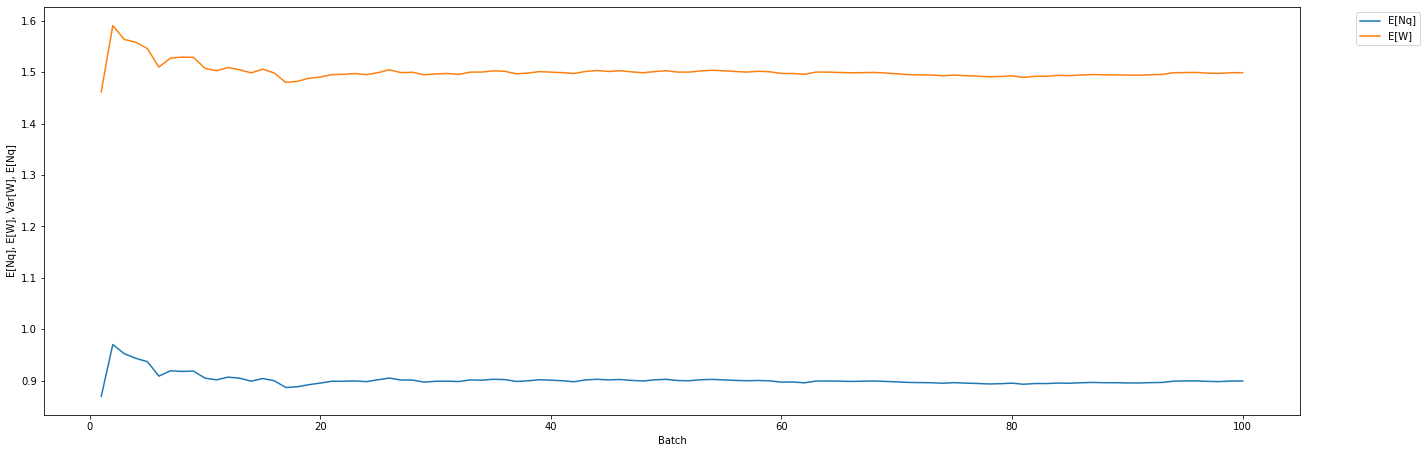

In [211]:
average_E_Nq = []
average_E_W = []
for i in range(1, len(df['E_Nq'])+1):
    average_E_Nq.append(sum(df['E_Nq'][:i])/i)
    average_E_W.append(sum(df['E_W'][:i])/i)

plot([average_E_Nq[:100], average_E_W[:100]], label=['E[Nq]', 'E[W]'], x_label='Batch', y_label='E[Nq], E[W], Var[W], E[Nq]')